Pokemon is a popular video game franchise released by Nintendo.  In the game, monsters populate the world much like animals do ours; they can be caught, raised, fought and bred.  Each pokemon starts off with base stats such as attack and health points, these stats increase as the pokemon's level increases, predominantly through fighting.  In addition to stats, each monster has a specific type, such as water, fire etc...; each type will be strong against certain types and weak against others, for example water is weak against grass type but strong against rock type.

When the first game was introduced (now called generation 1) there were only 151 species of pokemon discovered, but each new generation of games brings new pokemon and now they total over 800.  Certain pokemon evolve at specific levels, changing their form and growing much stronger comapred to simply leveling up.  Also each pokemon's level is capped at 100, and each will have a max experience points that determines how strong they are able to become.  In this analysis we will assume that all pokemon are fully levelled up.

There exists in the game a class above normal pokemon, called legendary pokemon.  These pokemon are the only one of their species and are stronger than normal pokemon and incredibly hard to catch.  As such any analysis on a practical team of pokemon will not include legendaries.

A trainer (pokemon player) can only hold up to 6 pokemon at a time, the same rule applies to battling, thus this analysis is going to try to determine the most well rounded team of 6 taking into account type advantage, base stats and max experience.

First things first, let's load the data and take a look at our database.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
Pokemon = pd.read_csv('~/Desktop/pokemon.csv')

In [7]:
Pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [8]:
Pokemon.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


To start the data cleaning we set the index to each pokemon's unique pokedex number.  The pokedex is the in game encyclopedia on pokemon.  One of the goals of the game is to completely fill the pokedex by catching every pokemon, pokemon data is automatically added to the pokedex when a pokemon is caught.

In [9]:
Pokemon = Pokemon.set_index('pokedex_number')
Pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


Now that we have set the index let us organize this dataset.  The first half of the columns are a pokemon's abilities and what types they're effective against, which is important for our analysis, but for readability let's put the name, type and base stats first.

In [10]:
cols_to_order = ['name', 'generation', 'type1', 'type2', 'hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense']
new_columns = cols_to_order + (Pokemon.columns.drop(cols_to_order).tolist())
Pokemon = Pokemon[new_columns]
Pokemon.head()

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,...,base_happiness,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,weight_kg,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,1,grass,poison,45,49,49,45,65,65,...,70,318,45,Seed Pokémon,1059860,0.7,Fushigidaneフシギダネ,88.1,6.9,0
2,Ivysaur,1,grass,poison,60,62,63,60,80,80,...,70,405,45,Seed Pokémon,1059860,1.0,Fushigisouフシギソウ,88.1,13.0,0
3,Venusaur,1,grass,poison,80,100,123,80,122,120,...,70,625,45,Seed Pokémon,1059860,2.0,Fushigibanaフシギバナ,88.1,100.0,0
4,Charmander,1,fire,NaN,39,52,43,65,60,50,...,70,309,45,Lizard Pokémon,1059860,0.6,Hitokageヒトカゲ,88.1,8.5,0
5,Charmeleon,1,fire,NaN,58,64,58,80,80,65,...,70,405,45,Flame Pokémon,1059860,1.1,Lizardoリザード,88.1,19.0,0


This looks better, but we have a lot of columns that do not have anything to do with battling, data such as height and weight.

In [11]:
Pokemon = Pokemon.drop(columns=['base_egg_steps', 'base_happiness', 'capture_rate', 'height_m', 'japanese_name', 'percentage_male', 'weight_kg', 'classfication'])
Pokemon.head()

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,...,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,1,grass,poison,45,49,49,45,65,65,...,2.0,1.0,1.0,2.0,1.0,1.0,0.5,318,1059860,0
2,Ivysaur,1,grass,poison,60,62,63,60,80,80,...,2.0,1.0,1.0,2.0,1.0,1.0,0.5,405,1059860,0
3,Venusaur,1,grass,poison,80,100,123,80,122,120,...,2.0,1.0,1.0,2.0,1.0,1.0,0.5,625,1059860,0
4,Charmander,1,fire,NaN,39,52,43,65,60,50,...,0.5,1.0,1.0,1.0,2.0,0.5,2.0,309,1059860,0
5,Charmeleon,1,fire,NaN,58,64,58,80,80,65,...,0.5,1.0,1.0,1.0,2.0,0.5,2.0,405,1059860,0


Now abilties was a feature introduced in generation 3 that adds another layer of complexity to this analysis.  It was retroactively applied to gen 1 and 2 pokemon but if one wants to use the results of this analysis in a gen 1 or 2 game abilities would be irrelevant.  So we will split the dataset so that abilities is on it's own, to be used for analysis on pokemon from gens 3 to 7. 

In [12]:
Pokemon_abilities = Pokemon.iloc[:,10:-3]
Pokemon_abilities.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
pokedex_number,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


In [13]:
Pokemon = Pokemon.drop(columns=['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water'])
Pokemon.head()

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,1,grass,poison,45,49,49,45,65,65,318,1059860,0
2,Ivysaur,1,grass,poison,60,62,63,60,80,80,405,1059860,0
3,Venusaur,1,grass,poison,80,100,123,80,122,120,625,1059860,0
4,Charmander,1,fire,NaN,39,52,43,65,60,50,309,1059860,0
5,Charmeleon,1,fire,NaN,58,64,58,80,80,65,405,1059860,0


Now that we have cleaned our data, let's take a look at the spread of the base stats of each pokemon.

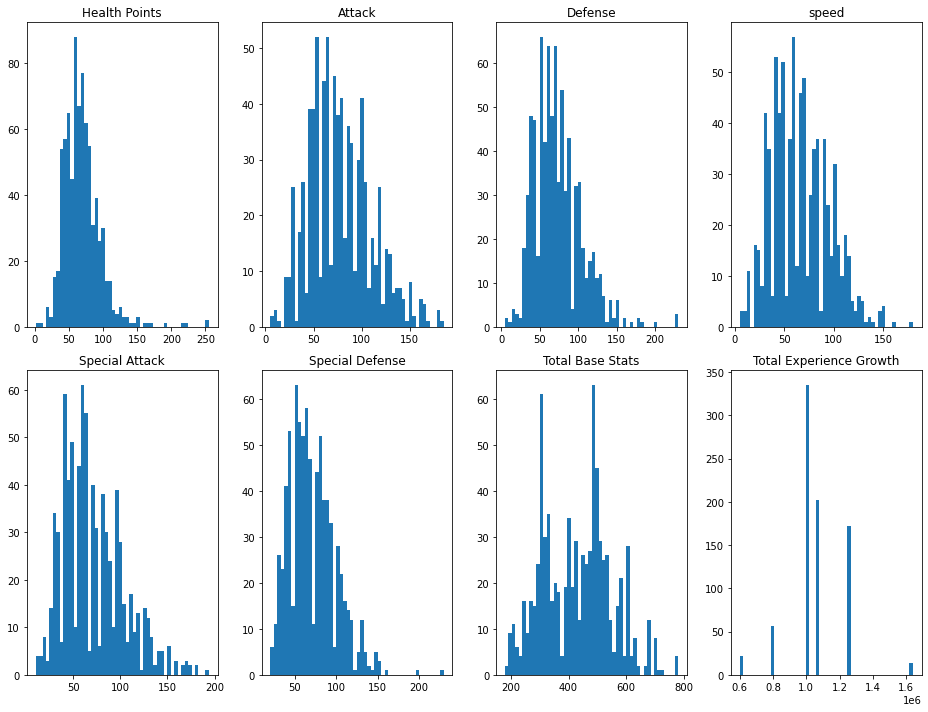

In [15]:
fig, axs = plt.subplots(2,4, figsize = (13,10))
axs[0,0].hist(Pokemon["hp"], 50)
axs[0,0].set_title('Health Points')
axs[0,1].hist(Pokemon["attack"], 50)
axs[0,1].set_title('Attack')
axs[0,2].hist(Pokemon["defense"], 50)
axs[0,2].set_title('Defense')
axs[0,3].hist(Pokemon["speed"], 50)
axs[0,3].set_title('speed')
axs[1,0].hist(Pokemon["sp_attack"], 50)
axs[1,0].set_title('Special Attack')
axs[1,1].hist(Pokemon["sp_defense"], 50)
axs[1,1].set_title('Special Defense')
axs[1,2].hist(Pokemon["base_total"], 50)
axs[1,2].set_title('Total Base Stats')
axs[1,3].hist(Pokemon["experience_growth"], 50)
axs[1,3].set_title('Total Experience Growth')
fig.tight_layout()
plt.show()

Overall there is a fairly normal spread of data, but in every category we see outliers.  Presumably from pokemon who are naturaly stronger than the rest such as the legendaries.  To confirm this let's look at the outliers in the base stats category (some normal pokemon will have one stat that is unusually high but the rest will be low, such as the pokemon Shuckle, who has the highest defense in the entire game but is lower than average for every other category).  If every stat is higher than average base stats will show this.

In [16]:
Pokemon[Pokemon['base_total']>700]

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
150,Mewtwo,1,psychic,NaN,106,150,70,140,194,120,780,1250000,1
382,Kyogre,3,water,NaN,100,150,90,90,180,160,770,1250000,1
383,Groudon,3,ground,NaN,100,180,160,90,150,90,770,1250000,1
384,Rayquaza,3,dragon,flying,105,180,100,115,180,100,780,1250000,1
493,Arceus,4,normal,NaN,120,120,120,120,120,120,720,1250000,1
718,Zygarde,6,dragon,ground,216,100,121,85,91,95,708,1250000,1


This confirms our suspicion in the introduction that legendary pokemon should be left out of the analysis.  So let's put them into their own dataset.

In [17]:
Pokemon_Legendary = pd.DataFrame()
Pokemon_Legendary = Pokemon[Pokemon["is_legendary"]==True]
Pokemon_Legendary

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
144,Articuno,1,ice,flying,90,85,100,85,95,125,580,1250000,1
145,Zapdos,1,electric,flying,90,90,85,100,125,90,580,1250000,1
146,Moltres,1,fire,flying,90,100,90,90,125,85,580,1250000,1
150,Mewtwo,1,psychic,NaN,106,150,70,140,194,120,780,1250000,1
151,Mew,1,psychic,NaN,100,100,100,100,100,100,600,1059860,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Celesteela,7,steel,flying,97,101,103,61,107,101,570,1250000,1
798,Kartana,7,grass,steel,59,181,131,109,59,31,570,1250000,1
799,Guzzlord,7,dark,dragon,223,101,53,43,97,53,570,1250000,1


In [18]:
Pokemon = Pokemon[Pokemon["is_legendary"] == 0]
Pokemon

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,1,grass,poison,45,49,49,45,65,65,318,1059860,0
2,Ivysaur,1,grass,poison,60,62,63,60,80,80,405,1059860,0
3,Venusaur,1,grass,poison,80,100,123,80,122,120,625,1059860,0
4,Charmander,1,fire,NaN,39,52,43,65,60,50,309,1059860,0
5,Charmeleon,1,fire,NaN,58,64,58,80,80,65,405,1059860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,Drampa,7,normal,dragon,78,60,85,36,135,91,485,1000000,0
781,Dhelmise,7,ghost,grass,70,131,100,40,86,90,517,1000000,0
782,Jangmo-o,7,dragon,NaN,45,55,65,45,45,45,300,1250000,0


Excellent, now the last step before diving in is the generations.  Since you can only catch gen 1 pokemon in a gen 1 game, the pokemon from that generation should be analyzed seperately.  In fact, let's start by analyzing each generation seperately.

In [19]:
grouped = Pokemon.groupby(Pokemon.generation) 
PokeGen_1= grouped.get_group(1) 
PokeGen_2= grouped.get_group(2)
PokeGen_3= grouped.get_group(3)
PokeGen_4= grouped.get_group(4)
PokeGen_5= grouped.get_group(5)
PokeGen_6= grouped.get_group(6)
PokeGen_7= grouped.get_group(7)


To start this analysis, the most important feature for battling pokemon is type advantage.  A relatively weak pokemon can overcome a stronger opponent if it has type advantage.  So our analysis is going to consist of finding a combination of 6 types that will be strongest against, and resistant to, the widest range of other types.  Once the best combination of types is found, within each type we will look at abilities (for gen 3 and higher), base stats and experience growth to short list the best possible combination of pokemon to construct a team.

Since type effectiveness was not included in our original dataset I have contructed a new one that has type effectiveness for Generation 1 pokemon.  I do not take credit for this data, I have constructed a dataset based on images found on Bulbapedia.

In [20]:
Gen1_type = pd.read_csv('~/Desktop/Pokemon type Gen1.csv', index_col=0)
Gen1_type

,Normal,Fight,Flying,Poison,Ground,Rock,Bug,Ghost,Fire,Water,Grass,Electric,Psychic,Ice,Dragon
Normal,1,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fight,2,1.0,0.5,0.5,1.0,2.0,0.5,0.0,1.0,1.0,1.0,1.0,0.5,2.0,1.0
Flying,1,2.0,1.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0
Poison,1,1.0,1.0,0.5,0.5,0.5,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0
Ground,1,1.0,0.0,2.0,1.0,2.0,0.5,1.0,2.0,1.0,0.5,2.0,1.0,1.0,1.0
Rock,1,0.5,2.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
Bug,1,0.5,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.0,2.0,1.0,2.0,1.0,1.0
Ghost,0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Fire,1,1.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,0.5,2.0,1.0,1.0,2.0,0.5
Water,1,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.5


This chart reads as follows: row is attacking, column is defending, 1 means normal damage, 0.5 means not very effective and 2.0 means super effective.  Since being super effective adds a point, and being not very effective takes away half a point, the simplest way is to sum over rows and columns respectively.  For rows, a higher number means more effective against more types, for columns, a lower number means more resistant to different types.  So let us look at attack:defense ratio, the 6 highest should be our 6 types for our team.

In [21]:
((Gen1_type.sum(axis=1) / Gen1_type.sum(axis=0)).sort_values(ascending=False)).head(6)

Psychic    1.178571
Flying     1.096774
Ghost      1.076923
Dragon     1.066667
Water      1.064516
Ground     1.062500
dtype: float64

Now we have our 6 types, so finding the strongest pokemon within each type should give us the most well rounded team for battling.

In [22]:
type_group = PokeGen_1.groupby(Pokemon.type1)
Poke_team = type_group.get_group('psychic')
Poke_team = Poke_team.append(type_group.get_group('ghost'))
Poke_team = Poke_team.append(type_group.get_group('dragon'))
Poke_team = Poke_team.append(type_group.get_group('water'))
Poke_team = Poke_team.append(type_group.get_group('ground'))
Poke_team = Poke_team.append(PokeGen_1.loc[(PokeGen_1['type1']=='normal')&(PokeGen_1['type2']=='flying')]) 
Poke_team

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
63,Abra,1,psychic,NaN,25,20,15,90,105,55,310,1059860,0
64,Kadabra,1,psychic,NaN,40,35,30,105,120,70,400,1059860,0
65,Alakazam,1,psychic,NaN,55,50,65,150,175,105,600,1059860,0
96,Drowzee,1,psychic,NaN,60,48,45,42,43,90,328,1000000,0
97,Hypno,1,psychic,NaN,85,73,70,67,73,115,483,1000000,0
122,Mr. Mime,1,psychic,fairy,40,45,65,90,100,120,460,1000000,0
92,Gastly,1,ghost,poison,30,35,30,80,100,35,310,1059860,0
93,Haunter,1,ghost,poison,45,50,45,95,115,55,405,1059860,0
94,Gengar,1,ghost,poison,60,65,80,130,170,95,600,1059860,0


The reason for the last append is because a pokemon like Pidgeot, who is a flying type in Gen 1, is classified as normal/flying in our dataset because after Gen 2 dual types were introduced and all these flying types in Gen 1 became 'some type'/flying.

The next step we can do to narrow down this list is to look at total base stats and experience growth.  Experience growth shows the maximum experience a pokemon can gain, and since pokemon's state increase with increasing experience, higher max experience means higher max stats.  So a combination of higher base stats and higher experience growth means a stronger pokemon.

Now, let's look at Psychic first.

In [23]:
(Poke_team[Poke_team['type1']=='psychic']).sort_values('base_total', ascending=False)

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
65,Alakazam,1,psychic,NaN,55,50,65,150,175,105,600,1059860,0
97,Hypno,1,psychic,NaN,85,73,70,67,73,115,483,1000000,0
122,Mr. Mime,1,psychic,fairy,40,45,65,90,100,120,460,1000000,0
64,Kadabra,1,psychic,NaN,40,35,30,105,120,70,400,1059860,0
96,Drowzee,1,psychic,NaN,60,48,45,42,43,90,328,1000000,0
63,Abra,1,psychic,NaN,25,20,15,90,105,55,310,1059860,0


It is clear that Alakazam has the highest base stats and experience growth, so our psychic pokemon is Alakazam!  Let's remove the other pokemon from our dataset.

In [24]:
Poke_team = Poke_team.drop([97,122,64,96,63])
Poke_team

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
65,Alakazam,1,psychic,NaN,55,50,65,150,175,105,600,1059860,0
92,Gastly,1,ghost,poison,30,35,30,80,100,35,310,1059860,0
93,Haunter,1,ghost,poison,45,50,45,95,115,55,405,1059860,0
94,Gengar,1,ghost,poison,60,65,80,130,170,95,600,1059860,0
147,Dratini,1,dragon,NaN,41,64,45,50,50,50,300,1250000,0
148,Dragonair,1,dragon,NaN,61,84,65,70,70,70,420,1250000,0
149,Dragonite,1,dragon,flying,91,134,95,80,100,100,600,1250000,0
7,Squirtle,1,water,NaN,44,48,65,43,50,64,314,1059860,0
8,Wartortle,1,water,NaN,59,63,80,58,65,80,405,1059860,0


In [25]:
Poke_team.loc[(Poke_team['type1']=='normal')&(Poke_team['type2']=='flying')].sort_values('base_total', ascending=False)

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
18,Pidgeot,1,normal,flying,83,80,80,121,135,80,579,1059860,0
85,Dodrio,1,normal,flying,60,110,70,110,60,60,470,1000000,0
22,Fearow,1,normal,flying,65,90,65,100,61,61,442,1000000,0
83,Farfetch'd,1,normal,flying,52,90,55,60,58,62,377,1000000,0
17,Pidgeotto,1,normal,flying,63,60,55,71,50,50,349,1059860,0
84,Doduo,1,normal,flying,35,85,45,75,35,35,310,1000000,0
21,Spearow,1,normal,flying,40,60,30,70,31,31,262,1000000,0
16,Pidgey,1,normal,flying,40,45,40,56,35,35,251,1059860,0


Since Pidgeot has the highest total base stats as the highest experience growth this is the pokemon we'll be keeping for flying type.

In [26]:
Poke_team = Poke_team.drop([85,22,83,17,84,21,16])
Poke_team

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
65,Alakazam,1,psychic,NaN,55,50,65,150,175,105,600,1059860,0
92,Gastly,1,ghost,poison,30,35,30,80,100,35,310,1059860,0
93,Haunter,1,ghost,poison,45,50,45,95,115,55,405,1059860,0
94,Gengar,1,ghost,poison,60,65,80,130,170,95,600,1059860,0
147,Dratini,1,dragon,NaN,41,64,45,50,50,50,300,1250000,0
148,Dragonair,1,dragon,NaN,61,84,65,70,70,70,420,1250000,0
149,Dragonite,1,dragon,flying,91,134,95,80,100,100,600,1250000,0
7,Squirtle,1,water,NaN,44,48,65,43,50,64,314,1059860,0
8,Wartortle,1,water,NaN,59,63,80,58,65,80,405,1059860,0


In [27]:
(Poke_team[Poke_team['type1']=='ghost']).sort_values('base_total', ascending=False)

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
94,Gengar,1,ghost,poison,60,65,80,130,170,95,600,1059860,0
93,Haunter,1,ghost,poison,45,50,45,95,115,55,405,1059860,0
92,Gastly,1,ghost,poison,30,35,30,80,100,35,310,1059860,0


In [28]:
Poke_team = Poke_team.drop([93,92])
Poke_team

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
65,Alakazam,1,psychic,NaN,55,50,65,150,175,105,600,1059860,0
94,Gengar,1,ghost,poison,60,65,80,130,170,95,600,1059860,0
147,Dratini,1,dragon,NaN,41,64,45,50,50,50,300,1250000,0
148,Dragonair,1,dragon,NaN,61,84,65,70,70,70,420,1250000,0
149,Dragonite,1,dragon,flying,91,134,95,80,100,100,600,1250000,0
7,Squirtle,1,water,NaN,44,48,65,43,50,64,314,1059860,0
8,Wartortle,1,water,NaN,59,63,80,58,65,80,405,1059860,0
9,Blastoise,1,water,NaN,79,103,120,78,135,115,630,1059860,0
54,Psyduck,1,water,NaN,50,52,48,55,65,50,320,1000000,0


In [29]:
(Poke_team[Poke_team['type1']=='dragon']).sort_values('base_total', ascending=False)

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
149,Dragonite,1,dragon,flying,91,134,95,80,100,100,600,1250000,0
148,Dragonair,1,dragon,NaN,61,84,65,70,70,70,420,1250000,0
147,Dratini,1,dragon,NaN,41,64,45,50,50,50,300,1250000,0


In [30]:
Poke_team = Poke_team.drop([148,147])
Poke_team


,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
65,Alakazam,1,psychic,NaN,55,50,65,150,175,105,600,1059860,0
94,Gengar,1,ghost,poison,60,65,80,130,170,95,600,1059860,0
149,Dragonite,1,dragon,flying,91,134,95,80,100,100,600,1250000,0
7,Squirtle,1,water,NaN,44,48,65,43,50,64,314,1059860,0
8,Wartortle,1,water,NaN,59,63,80,58,65,80,405,1059860,0
9,Blastoise,1,water,NaN,79,103,120,78,135,115,630,1059860,0
54,Psyduck,1,water,NaN,50,52,48,55,65,50,320,1000000,0
55,Golduck,1,water,NaN,80,82,78,85,95,80,500,1000000,0
60,Poliwag,1,water,NaN,40,50,40,90,40,40,300,1059860,0


In [31]:
(Poke_team[Poke_team['type1']=='water']).sort_values('base_total', ascending=False)

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
130,Gyarados,1,water,flying,95,155,109,81,70,130,640,1250000,0
9,Blastoise,1,water,NaN,79,103,120,78,135,115,630,1059860,0
80,Slowbro,1,water,psychic,95,75,180,30,130,80,590,1000000,0
131,Lapras,1,water,ice,130,85,80,60,85,95,535,1250000,0
91,Cloyster,1,water,ice,50,95,180,70,85,45,525,1250000,0
134,Vaporeon,1,water,NaN,130,65,60,65,110,95,525,1000000,0
121,Starmie,1,water,psychic,60,75,85,115,100,85,520,1250000,0
73,Tentacruel,1,water,poison,80,70,65,100,80,120,515,1250000,0
62,Poliwrath,1,water,fighting,90,95,95,70,70,90,510,1059860,0


In [32]:
Poke_team = Poke_team.drop([9,80,131,91,134,121,73,62,55,99,87,119,117,8,61,120,72,98,86,54,118,79,7,90,60,116,129])
Poke_team

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
65,Alakazam,1,psychic,NaN,55,50,65,150,175,105,600,1059860,0
94,Gengar,1,ghost,poison,60,65,80,130,170,95,600,1059860,0
149,Dragonite,1,dragon,flying,91,134,95,80,100,100,600,1250000,0
130,Gyarados,1,water,flying,95,155,109,81,70,130,640,1250000,0
27,Sandshrew,1,ground,ice,50,75,90,40,10,35,300,1000000,0
28,Sandslash,1,ground,ice,75,100,120,65,25,65,450,1000000,0
50,Diglett,1,ground,ground,10,55,30,90,35,45,265,1000000,0
51,Dugtrio,1,ground,ground,35,100,60,110,50,70,425,1000000,0
104,Cubone,1,ground,NaN,50,50,95,35,40,50,320,1000000,0


In [33]:
(Poke_team[Poke_team['type1']=='ground']).sort_values('base_total', ascending=False)

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
112,Rhydon,1,ground,rock,105,130,120,40,45,45,485,1250000,0
28,Sandslash,1,ground,ice,75,100,120,65,25,65,450,1000000,0
51,Dugtrio,1,ground,ground,35,100,60,110,50,70,425,1000000,0
105,Marowak,1,ground,fire,60,80,110,45,50,80,425,1000000,0
111,Rhyhorn,1,ground,rock,80,85,95,25,30,30,345,1250000,0
104,Cubone,1,ground,NaN,50,50,95,35,40,50,320,1000000,0
27,Sandshrew,1,ground,ice,50,75,90,40,10,35,300,1000000,0
50,Diglett,1,ground,ground,10,55,30,90,35,45,265,1000000,0


In [34]:
Poke_team = Poke_team.drop([28,51,105,111,104,27,50])
Poke_team

,name,generation,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense,base_total,experience_growth,is_legendary
pokedex_number,,,,,,,,,,,,,
65,Alakazam,1,psychic,NaN,55,50,65,150,175,105,600,1059860,0
94,Gengar,1,ghost,poison,60,65,80,130,170,95,600,1059860,0
149,Dragonite,1,dragon,flying,91,134,95,80,100,100,600,1250000,0
130,Gyarados,1,water,flying,95,155,109,81,70,130,640,1250000,0
112,Rhydon,1,ground,rock,105,130,120,40,45,45,485,1250000,0
18,Pidgeot,1,normal,flying,83,80,80,121,135,80,579,1059860,0


Thus we have our team of 6 pokemon from generation 1.  This is by no means the best team you can have, as different strategies, items and move sets will all factor into the outcome of a battle.  But this is the best combination of types to give you the most balanced team possible.